# Question 4

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from pylab import rcParams
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data= pd.read_csv(r'online_shoppers_intention.csv')
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data preprocessing

In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
label="Revenue"
features=list(data.columns)
features.remove(label)
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [6]:
cat_features = []
for fet in features:
    if len(data[fet].value_counts()) <20:
        cat_features.append(fet)
cat_features

['Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType',
 'Weekend']

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for c in cat_features:
    le = LabelEncoder()
    le.fit(data[c])
    data[c] = le.transform(data[c])
  




for i in cat_features:
  data = pd.get_dummies(data, prefix=[i], columns = [i])

## EDA

classes=list(data[label].unique())
classes

classes = pd.value_counts(data[label], sort = True)

Text(0, 0.5, 'Frequency')

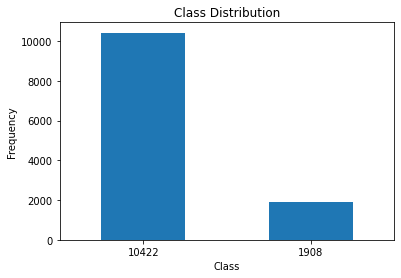

In [8]:
classes=list(data[label].unique())
classes

classes = pd.value_counts(data[label], sort = True)

classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xticks(range(2), classes)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
features=list(data.columns)
features.remove(label)
features

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType',
 'Informational_0',
 'Informational_1',
 'Informational_2',
 'Informational_3',
 'Informational_4',
 'Informational_5',
 'Informational_6',
 'Informational_7',
 'Informational_8',
 'Informational_9',
 'Informational_10',
 'Informational_11',
 'Informational_12',
 'Informational_13',
 'Informational_14',
 'Informational_15',
 'Informational_16',
 'SpecialDay_0',
 'SpecialDay_1',
 'SpecialDay_2',
 'SpecialDay_3',
 'SpecialDay_4',
 'SpecialDay_5',
 'Month_0',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'OperatingSystems_0',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'Browser_0',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser

In [10]:
#Create independent and Dependent Features
columns = data.columns.tolist()

# Define a random state 
state = np.random.RandomState(42)
X = data[features]
Y = data[label]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(12330, 77)
(12330,)


In [11]:
from sklearn.model_selection import train_test_split
X, X_Test, Y,Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

## Model train (With handling data Imbalance)

In [12]:
Y.value_counts()

False    8338
True     1526
Name: Revenue, dtype: int64

In [13]:
Y_Test.value_counts()

False    2084
True      382
Name: Revenue, dtype: int64

In [14]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

## Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=1,solver='lbfgs', max_iter=10000)
#outputs for every model
model1 = model_report(logistic_model,X,Y,X_Test,Y_Test, "Logistic Regression")

model1

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression,0.884428,0.395288,0.736585,0.51448,0.684688,0.455575


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
#outputs for every model
model2 = model_report(tree_model,X,Y,X_Test,Y_Test, " Decision Tree")
model2

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.892539,0.575916,0.681115,0.624113,0.763246,0.561933


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")
#forest_model.fit(x_train,y_train)
#outputs for every model
model3 = model_report(forest_model,X,Y,X_Test,Y_Test, "Random Forest")
model3

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.887267,0.363874,0.798851,0.5,0.67354,0.446317


<AxesSubplot:>

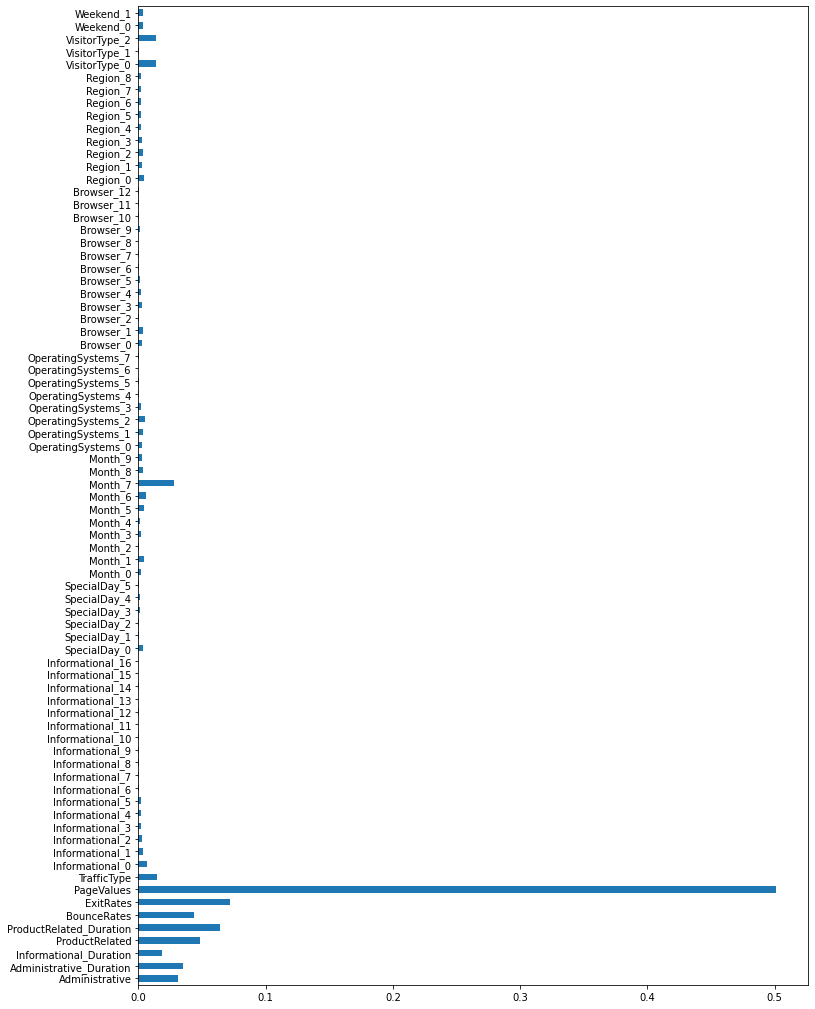

In [19]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,18))

## XGBOOST

In [20]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier( booster='gbtree', 
                 gamma=0, learning_rate=0.1,
                    max_depth = 7, min_child_weight=1,  
                    n_jobs=1,  objective='binary:logistic', 
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,n_estimators=500)


# xgb_model.fit(x_train,y_train)
#outputs for every model
model5 = model_report(xgb_model,X,Y,X_Test,Y_Test, "XGBOOST")
model5

f:\Applications\Python 3.10.4\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
f:\Applications\Python 3.10.4\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
f:\Applications\Python 3.10.4\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.R

[19:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,XGBOOST,0.891322,0.549738,0.686275,0.610465,0.751836,0.548211
